#### **TASK-2**

**Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.** 

**Business Constraint:** Note that it is worse to state an applicant as a low credit risk when they are actually a high risk(Type2) - False Negative , than it is to state an applicant to be a high credit risk when they aren’t(Type1) - False Positive. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data2')

In [3]:
data.head()

,Unnamed: 0,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,loan_application_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,0,436,67,1,3,1,1,4,1,1,0,6,1169000,4,0,0,2,1,0
1,1,115,22,0,1,1,1,2,1,1,1,48,5951000,2,0,0,1,3,1
2,2,380,49,1,3,2,1,3,3,1,2,12,2096000,2,0,0,1,1,0
3,3,117,45,1,3,2,0,4,1,1,3,42,7882000,2,0,1,1,3,0
4,4,713,53,1,3,2,0,4,1,1,4,24,4870000,3,0,0,2,2,1


In [4]:
data.drop(['Unnamed: 0','loan_application_id','applicant_id','Principal_loan_amount','Gender'], axis=1, inplace=True)

In [5]:
data.head(2)

,Primary_applicant_age_in_years,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,3,1,1,4,1,1,6,4,0,0,2,1,0
1,22,1,1,1,2,1,1,48,2,0,0,1,3,1


In [6]:
X = data.loc[:, data.columns != 'high_risk_applicant' ] # independent variable

y = data.loc[:, data.columns == 'high_risk_applicant'] #target variable

In [7]:
X = pd.get_dummies(X, drop_first=True)

In [8]:
X.head()

,Primary_applicant_age_in_years,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,67,3,1,1,4,1,1,6,4,0,0,2,1
1,22,1,1,1,2,1,1,48,2,0,0,1,3
2,49,3,2,1,3,3,1,12,2,0,0,1,1
3,45,3,2,0,4,1,1,42,2,0,1,1,3
4,53,3,2,0,4,1,1,24,3,0,0,2,2


In [9]:
y.head()

,high_risk_applicant
0,0
1,1
2,0
3,0
4,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [12]:
X_train.head()

,Primary_applicant_age_in_years,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
834,25,1,1,1,3,3,1,15,2,0,0,1,3
227,53,3,1,0,4,0,1,12,4,0,0,1,3
471,23,1,1,1,4,1,1,6,4,0,0,1,3
929,43,3,2,1,2,3,1,12,4,0,0,2,2
457,35,3,1,0,4,1,1,12,3,0,0,1,3


In [13]:
X_test.head()

,Primary_applicant_age_in_years,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
518,43,3,1,1,2,1,1,6,3,0,0,1,3
871,46,3,2,1,4,1,0,6,1,0,0,2,1
797,22,1,1,2,4,3,1,12,2,0,0,2,1
274,34,0,1,1,1,3,1,30,1,0,0,1,3
325,39,3,1,1,4,3,0,8,1,0,0,2,1


In [14]:
X_train.shape,X_test.shape

((700, 13), (300, 13))

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [18]:
confusion_matrix

array([[193,   9],
       [ 78,  20]])

<AxesSubplot:>

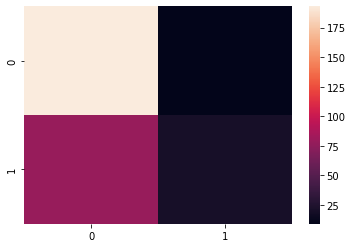

In [19]:
sns.heatmap(confusion_matrix)

In [20]:
TN = 193
FP = 78
FN = 9
TP = 20

In [21]:
TPR = 11/(11+4) #TPR = TP/P
TPR

0.7333333333333333

In [22]:
TNR = 198/(198+87) #TNR = TN/N
TNR

0.6947368421052632

In [23]:
FPR = 87/(198+87) #FPR = FP/N 
FPR

0.30526315789473685

In [24]:
FNR = 4/(11+4) #FNR = FN/p
FNR

0.26666666666666666

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       202
           1       0.69      0.20      0.31        98

    accuracy                           0.71       300
   macro avg       0.70      0.58      0.57       300
weighted avg       0.70      0.71      0.65       300



In [26]:
data = pd.read_csv('data2')

In [27]:
data.head()

,Unnamed: 0,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,loan_application_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,0,436,67,1,3,1,1,4,1,1,0,6,1169000,4,0,0,2,1,0
1,1,115,22,0,1,1,1,2,1,1,1,48,5951000,2,0,0,1,3,1
2,2,380,49,1,3,2,1,3,3,1,2,12,2096000,2,0,0,1,1,0
3,3,117,45,1,3,2,0,4,1,1,3,42,7882000,2,0,1,1,3,0
4,4,713,53,1,3,2,0,4,1,1,4,24,4870000,3,0,0,2,2,1


In [28]:
data.drop(['Unnamed: 0','loan_application_id','applicant_id','Principal_loan_amount','Marital_status'], axis=1, inplace=True)

In [29]:
data.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,1,1,1,4,1,1,6,4,0,0,2,1,0
1,22,0,1,1,2,1,1,48,2,0,0,1,3,1
2,49,1,2,1,3,3,1,12,2,0,0,1,1,0
3,45,1,2,0,4,1,1,42,2,0,1,1,3,0
4,53,1,2,0,4,1,1,24,3,0,0,2,2,1


In [30]:
X = data.loc[:, data.columns != 'high_risk_applicant']  # independent variables

y = data.loc[:, data.columns == 'high_risk_applicant']  # Target variable

In [31]:
X = pd.get_dummies(X,drop_first=True)

In [32]:
y.head()  

,high_risk_applicant
0,0
1,1
2,0
3,0
4,1


In [33]:
X.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,67,1,1,1,4,1,1,6,4,0,0,2,1
1,22,0,1,1,2,1,1,48,2,0,0,1,3
2,49,1,2,1,3,3,1,12,2,0,0,1,1
3,45,1,2,0,4,1,1,42,2,0,1,1,3
4,53,1,2,0,4,1,1,24,3,0,0,2,2


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)

In [35]:
X_train.shape,X_test.shape

((700, 13), (300, 13))

In [36]:
X_train.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
570,23,0,1,2,4,3,1,24,4,0,0,1,3
137,66,1,1,1,3,3,1,12,4,0,0,1,3
953,26,0,1,1,2,0,1,36,4,0,0,2,3
882,36,1,1,1,4,1,1,30,4,0,0,2,1
606,74,1,1,1,2,0,1,24,3,0,0,1,1


In [37]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve

In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7)

model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [39]:
model.coef_.round(2)

array([[-0.02, -0.5 ,  0.05,  0.17, -0.03, -0.02,  0.41,  0.03,  0.12,
         0.88, -0.58, -0.15,  0.03]])

In [40]:
model.intercept_.round(2)

array([-1.41])

In [41]:
y_pred_class=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [42]:
y_pred_class[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
y_pred_class[:5][:]

array([0, 0, 0, 0, 0])

In [44]:
y_pred_prob[:5,:]

array([[0.76572881, 0.23427119],
       [0.82419106, 0.17580894],
       [0.699331  , 0.300669  ],
       [0.81894042, 0.18105958],
       [0.57882288, 0.42117712]])

In [45]:
y_pred_prob[:5,0]

array([0.76572881, 0.82419106, 0.699331  , 0.81894042, 0.57882288])

In [46]:
#y_pred_prob[:20,:]
(y_pred_prob[:5,0]>0.5)*1

array([1, 1, 1, 1, 1])

In [47]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

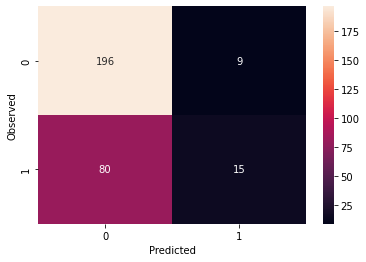

In [48]:
draw_cm(y_test,y_pred_class);

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

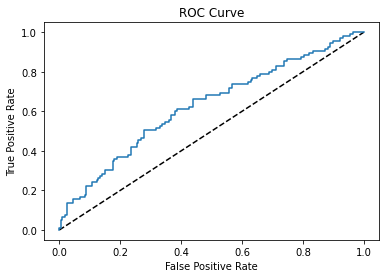

In [50]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [51]:
data_ = pd.read_csv('data2')

In [52]:
data_.drop(['Unnamed: 0','loan_application_id','applicant_id','Marital_status','Number_of_dependents','Housing','Years_at_current_residence','Foreign_worker','Principal_loan_amount','EMI_rate_in_percentage_of_disposable_income','Has_coapplicant','Has_guarantor'], axis=1, inplace=True)

In [53]:
data_.head()

,Primary_applicant_age_in_years,Gender,Employment_status,Months_loan_taken_for,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,1,1,6,2,1,0
1,22,0,1,48,1,3,1
2,49,1,3,12,1,1,0
3,45,1,1,42,1,3,0
4,53,1,1,24,2,2,1


In [54]:
X = data_.loc[:, data_.columns != 'high_risk_applicant']  # independent variables

y = data_.loc[:, data_.columns == 'high_risk_applicant']  # Target variable

In [55]:
X = pd.get_dummies(X,drop_first=True)

In [56]:
y.head()  

,high_risk_applicant
0,0
1,1
2,0
3,0
4,1


In [57]:
X.head()

,Primary_applicant_age_in_years,Gender,Employment_status,Months_loan_taken_for,Number_of_existing_loans_at_this_bank,Loan_history
0,67,1,1,6,2,1
1,22,0,1,48,1,3
2,49,1,3,12,1,1
3,45,1,1,42,1,3
4,53,1,1,24,2,2


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)

In [59]:
X_train.shape,X_test.shape

((700, 6), (300, 6))

In [60]:
X_train.head()

,Primary_applicant_age_in_years,Gender,Employment_status,Months_loan_taken_for,Number_of_existing_loans_at_this_bank,Loan_history
570,23,0,3,24,1,3
137,66,1,3,12,1,3
953,26,0,0,36,2,3
882,36,1,1,30,2,1
606,74,1,0,24,1,1


In [61]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve

In [62]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7)

model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [63]:
model.coef_.round(2)

array([[-0.02, -0.53, -0.02,  0.04, -0.03,  0.08]])

In [64]:
model.intercept_.round(2)

array([-0.78])

In [65]:
y_pred_class=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [66]:
y_pred_class[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
y_pred_class[:5][:]

array([0, 0, 0, 0, 0])

In [68]:
y_pred_prob[:5,:]

array([[0.74116869, 0.25883131],
       [0.81851872, 0.18148128],
       [0.64998628, 0.35001372],
       [0.74147581, 0.25852419],
       [0.64224862, 0.35775138]])

In [69]:
y_pred_prob[:5,0]

array([0.74116869, 0.81851872, 0.64998628, 0.74147581, 0.64224862])

In [70]:
#y_pred_prob[:20,:]
(y_pred_prob[:5,0]>0.5)*1

array([1, 1, 1, 1, 1])

In [71]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

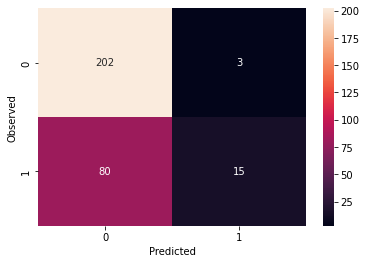

In [72]:
draw_cm(y_test,y_pred_class);

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

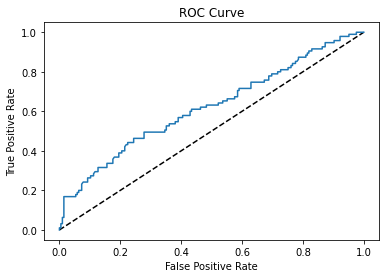

In [74]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       205
           1       0.83      0.16      0.27        95

    accuracy                           0.72       300
   macro avg       0.77      0.57      0.55       300
weighted avg       0.75      0.72      0.65       300



In [76]:
data_.head()

,Primary_applicant_age_in_years,Gender,Employment_status,Months_loan_taken_for,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,1,1,6,2,1,0
1,22,0,1,48,1,3,1
2,49,1,3,12,1,1,0
3,45,1,1,42,1,3,0
4,53,1,1,24,2,2,1


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
scaler.fit(data_.drop('high_risk_applicant',axis=1))

StandardScaler()

In [79]:
scaled_features = scaler.transform(data_.drop('high_risk_applicant',axis=1))

In [80]:
df_feat = pd.DataFrame(scaled_features,columns=data_.columns[:-1])

In [81]:
df_feat.head()

,Primary_applicant_age_in_years,Gender,Employment_status,Months_loan_taken_for,Number_of_existing_loans_at_this_bank,Loan_history
0,2.766456,0.670280,-0.289639,-1.236478,1.027079,-1.146212
1,-1.191404,-1.491914,-0.289639,2.248194,-0.704926,0.734365
2,1.183312,0.670280,1.824516,-0.738668,-0.704926,-1.146212
3,0.831502,0.670280,-0.289639,1.750384,-0.704926,0.734365
4,1.535122,0.670280,-0.289639,0.256953,1.027079,-0.205923


In [82]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data_['high_risk_applicant'],
                                                    test_size=0.30,random_state=101)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=1)

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
pred = knn.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(confusion_matrix(y_test,pred))

[[148  56]
 [ 56  40]]


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       204
           1       0.42      0.42      0.42        96

    accuracy                           0.63       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.63      0.63      0.63       300



In [90]:
import numpy as np
error_rate = []
test_scores = []
train_scores = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Error Rate')

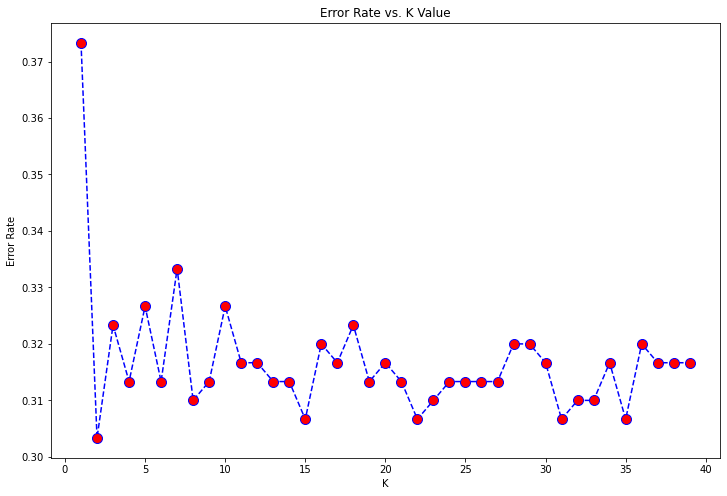

In [91]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [92]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 96.57142857142857 % and k = [1]


In [93]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 69.66666666666667 % and k = [2]


In [94]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[193  11]
 [ 84  12]]


              precision    recall  f1-score   support

           0       0.70      0.95      0.80       204
           1       0.52      0.12      0.20        96

    accuracy                           0.68       300
   macro avg       0.61      0.54      0.50       300
weighted avg       0.64      0.68      0.61       300



<AxesSubplot:>

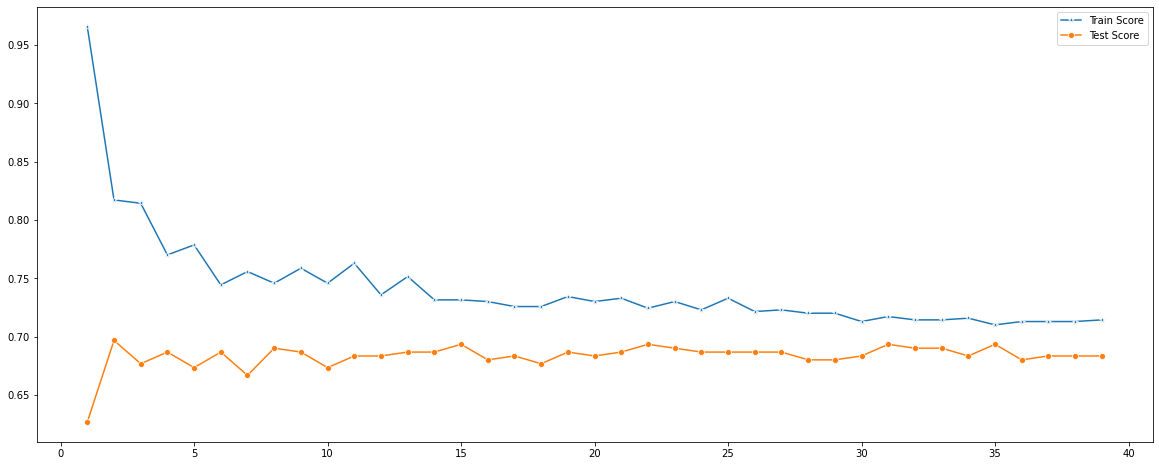

In [95]:
plt.figure(figsize=(20,8))
sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')



In [96]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(20)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6833333333333333

In [97]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix



In [98]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



Predicted,0,1,All
True,,,
0,193,11,204
1,84,12,96
All,277,23,300


Text(0.5, 15.0, 'Predicted label')

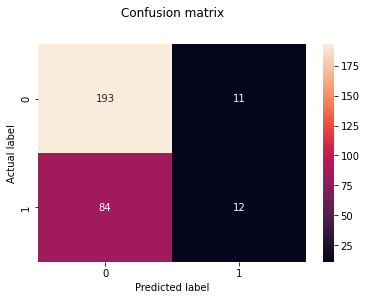

In [99]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [100]:
12/(12+11)

0.5217391304347826

In [101]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       204
           1       0.52      0.12      0.20        96

    accuracy                           0.68       300
   macro avg       0.61      0.54      0.50       300
weighted avg       0.64      0.68      0.61       300



In [102]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))



Accuracy of the model : 0.683


In [103]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

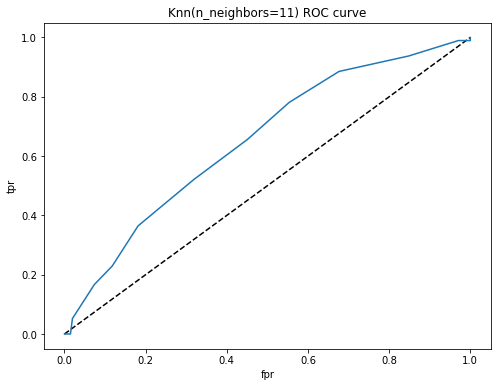

In [104]:
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [105]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6520118464052287

#### **Provide the answers for the below points:**

1. Explain your intuition behind the features used for modeling.
- Dropped Id Columns, Tried Both Keeping ''Principal_loan_amount'' & Removing also, Removing It Increases Accuracy,Keeping It Just Increases The Calculation Part It's Of No Use For Our Prediction Part. 

2. Are you creating new derived features? If yes explain the intuition behind them.
- No.

3. Are there missing values? If yes how you plan to handle it.
- Yes, Dropped The Columns Containing Missing Values.

4. How categorical features are handled for modeling.
- Applied Label Encoder.

5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
- Marital_status & Gender (Strong Positive Correlation 0.75), Principal_loan_amount & Months_loan_taken_for (Strong Positive Correlation 0.62).

6. Do you plan to drop the correlated feature? If yes then how.
- Tried Both Keeping And Removing, Gender, Marital, Principal_loan_amount, Months_loan_taken_for, Removing It Increases Accuracy,Keeping It Just Increases The Calculation Part It's Of No Use For Our Prediction Part. 

7. Which ML algorithm you plan to use for modeling.
- Logistic Regression, KNN.